# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [33]:
import pandas as pd
import numpy as np
import scipy as sc
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
import time
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [34]:
data = pd.read_csv("motorbike_ambulance_calls.csv")

In [35]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [84]:
print(data.isnull().sum())

index          0
date           0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
cnt            0
LOF_Score      0
LOF_Anomaly    0
dtype: int64


In [37]:
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

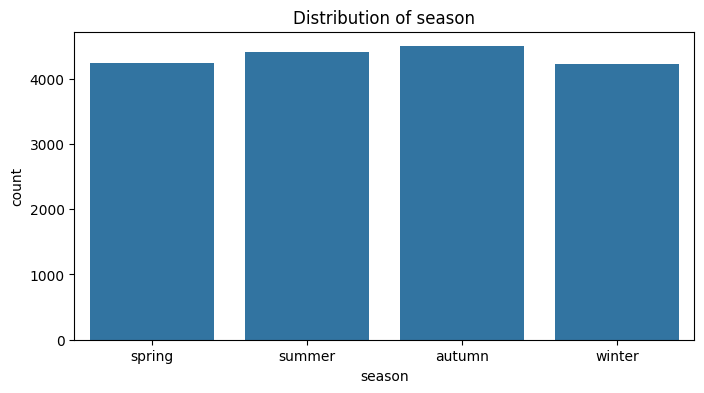

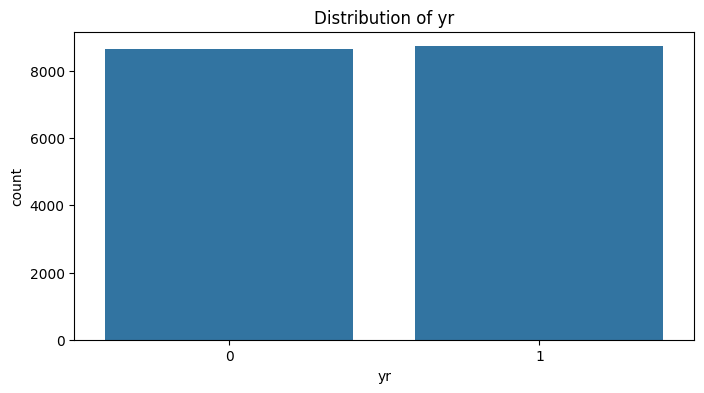

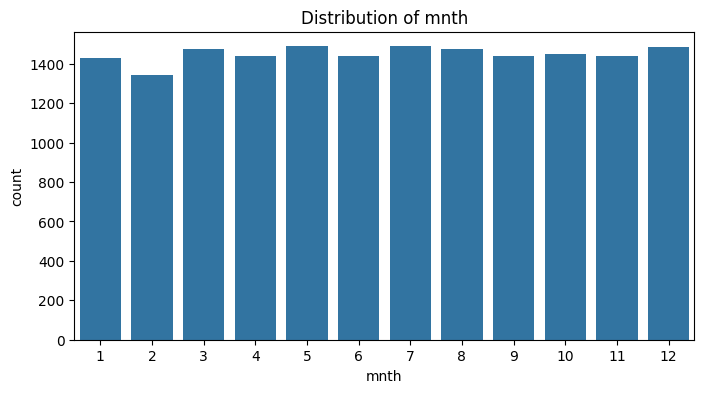

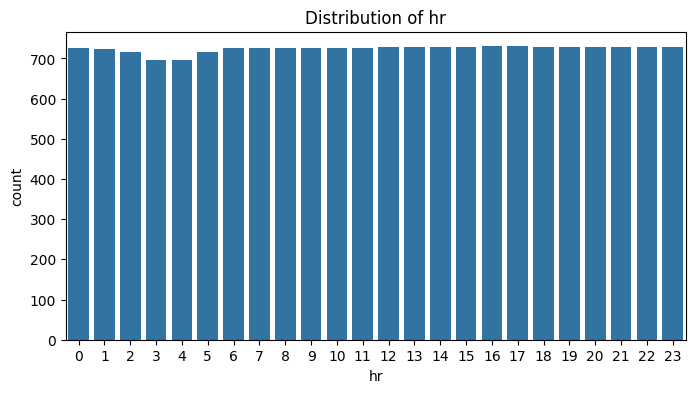

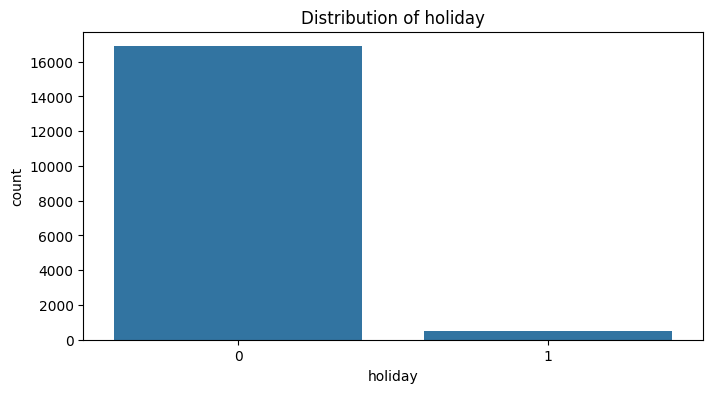

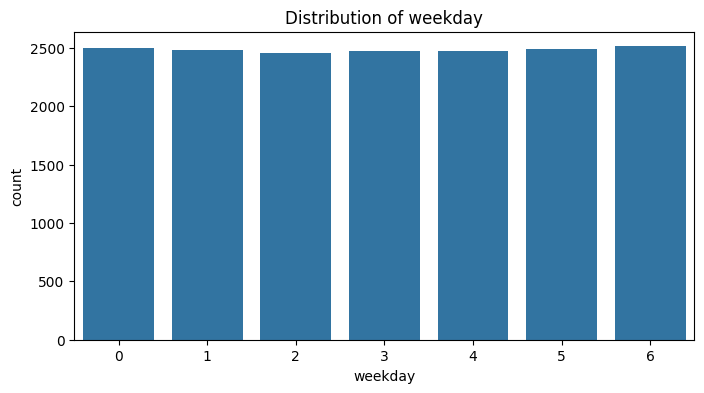

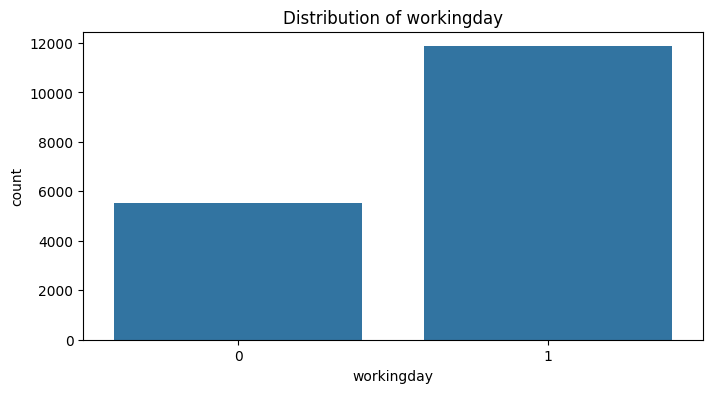

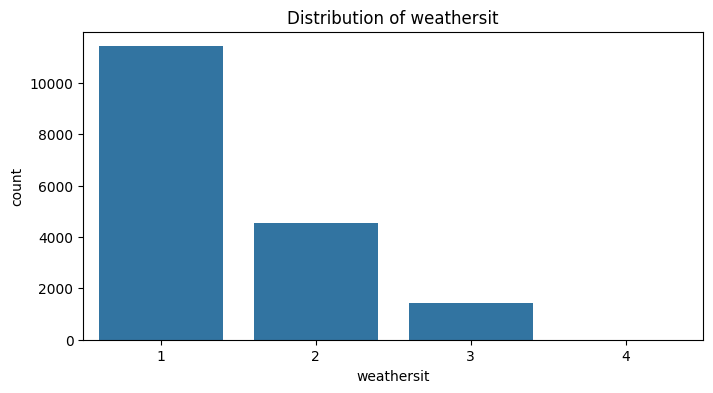

In [38]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

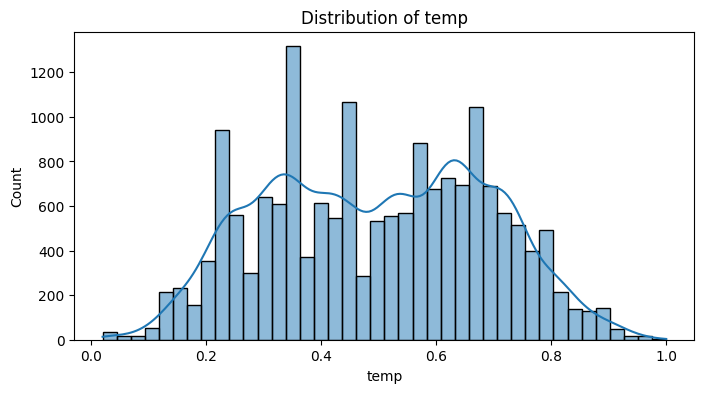

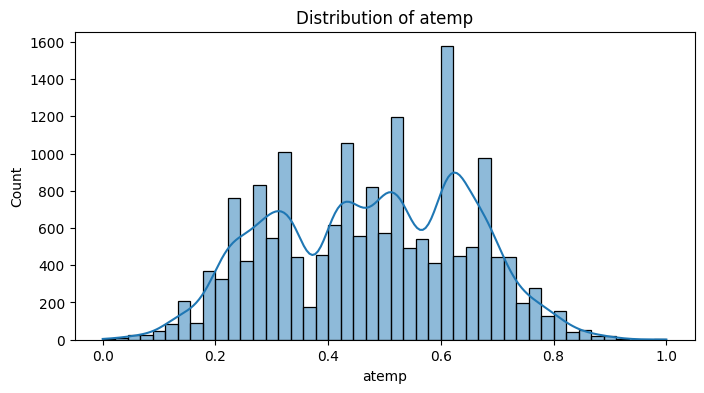

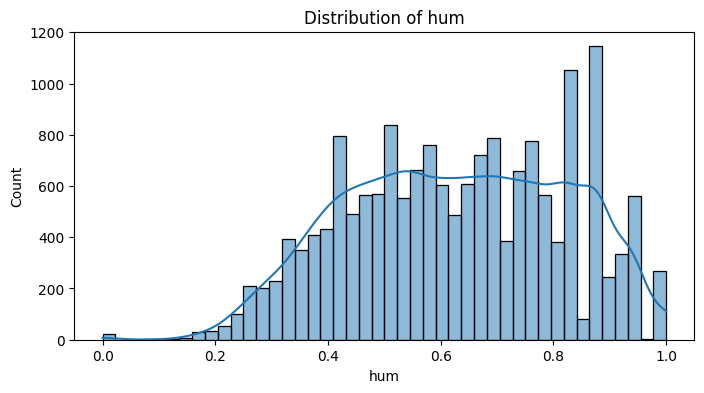

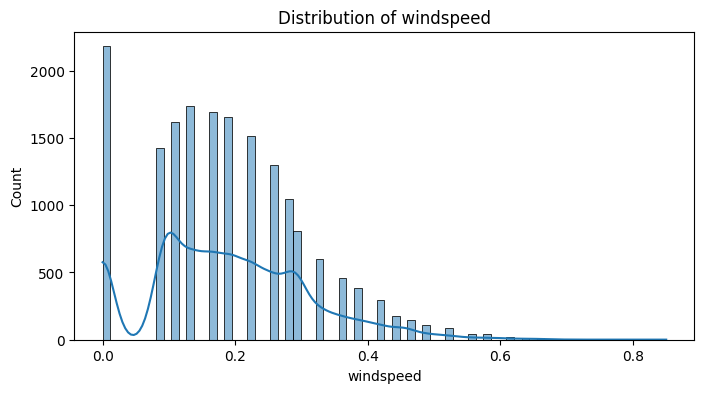

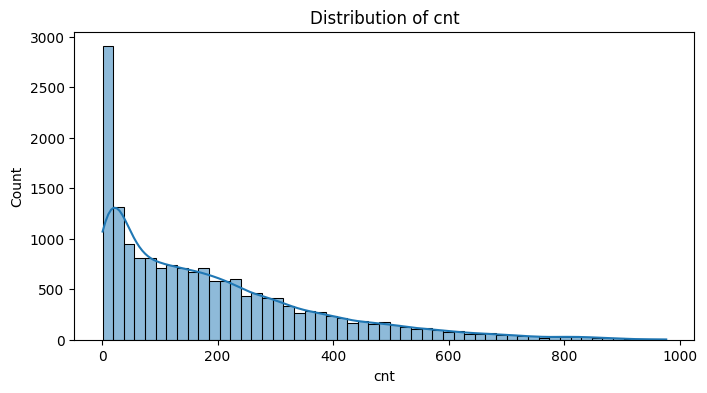

In [39]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [40]:
for col in numerical_cols:
    skewness = data[col].skew()
    kurtosis = data[col].kurt()
    print(f"{col} - Skewness: {skewness}, \nKurtosis: {kurtosis}\n")

temp - Skewness: -0.00602088334827027, 
Kurtosis: -0.9418442040701822

atemp - Skewness: -0.09042885855903955, 
Kurtosis: -0.8454118948352991

hum - Skewness: -0.11128714936537845, 
Kurtosis: -0.8261167359052539

windspeed - Skewness: 0.5749052034923136, 
Kurtosis: 0.5908204107371691

cnt - Skewness: 1.2774116037490577, 
Kurtosis: 1.4172032806553756



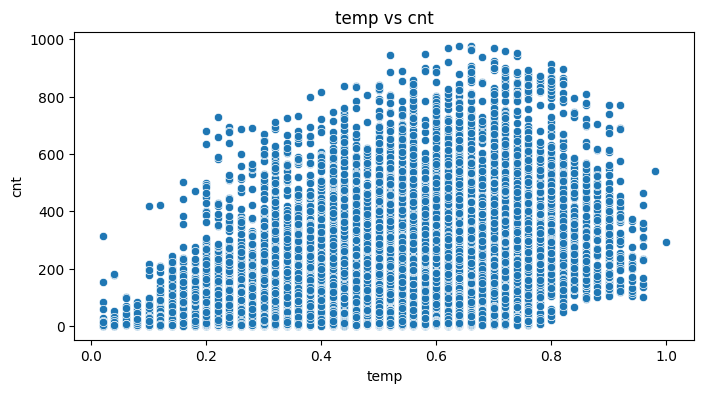

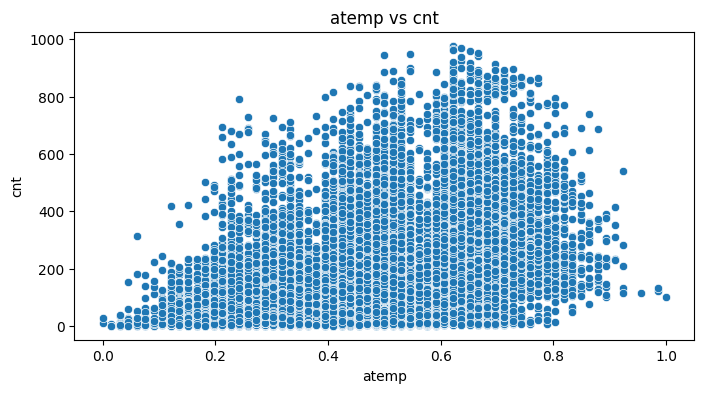

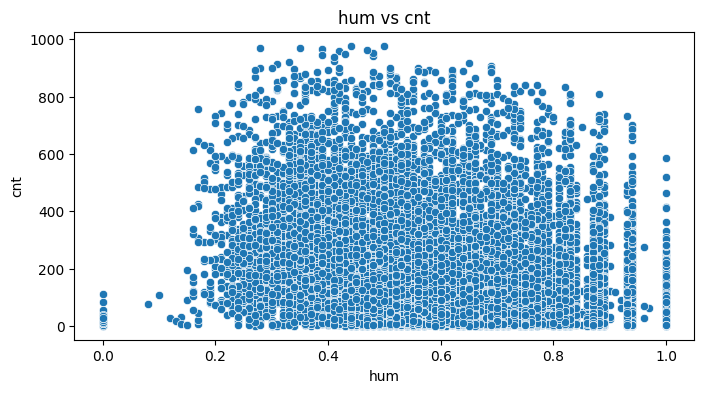

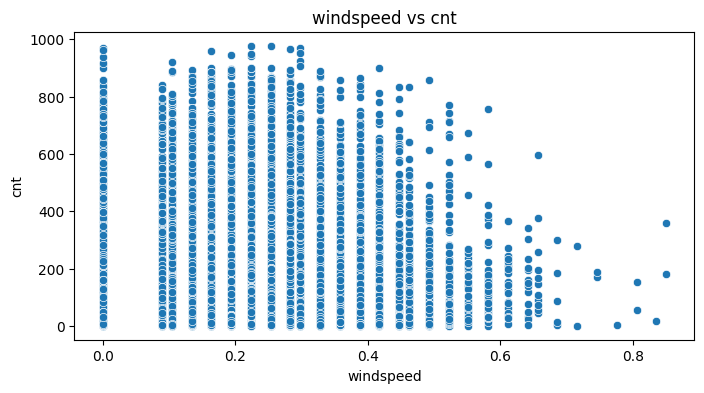

In [41]:
for col in numerical_cols[:-1]:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=data, x=col, y='cnt')
    plt.title(f"{col} vs cnt")
    plt.show()

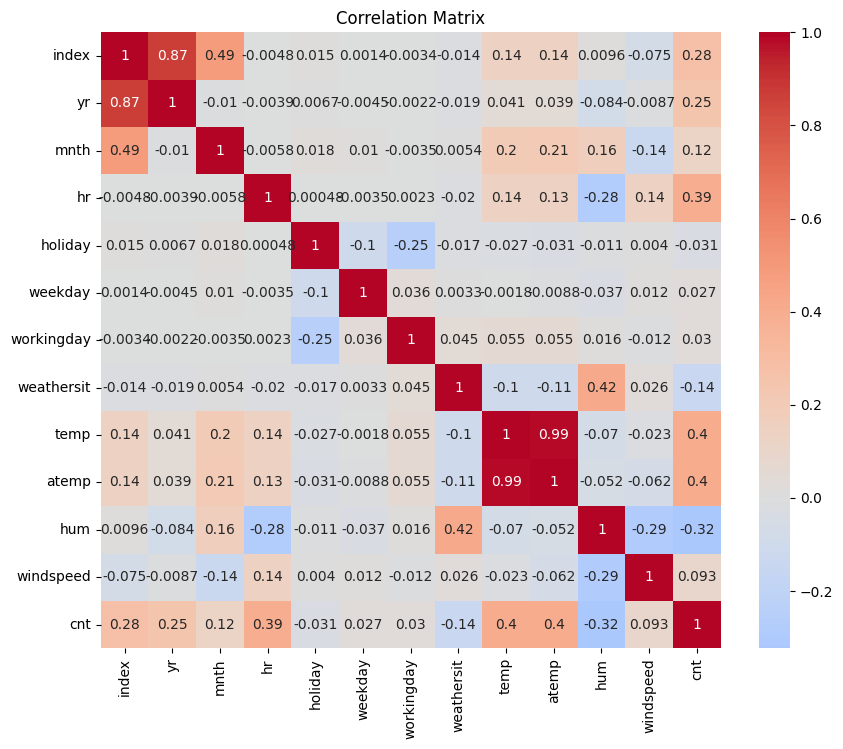

Top 3 features correlated with 'cnt':
temp     0.404772
atemp    0.400929
hr       0.394071
Name: cnt, dtype: float64


In [42]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

corr_with_target = corr_matrix['cnt'].abs().sort_values(ascending=False)
print("Top 3 features correlated with 'cnt':")
print(corr_with_target[1:4])

7. Маштабування даних (Z-score) 

In [43]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data)

       index      date  season  yr  mnth  hr  holiday  weekday  workingday  \
0          1    1/1/11  spring   0     1   0        0        6           0   
1          2    1/1/11  spring   0     1   1        0        6           0   
2          3    1/1/11  spring   0     1   2        0        6           0   
3          4    1/1/11  spring   0     1   3        0        6           0   
4          5    1/1/11  spring   0     1   4        0        6           0   
...      ...       ...     ...  ..   ...  ..      ...      ...         ...   
17374  17375  12/31/12  spring   1    12  19        0        1           1   
17375  17376  12/31/12  spring   1    12  20        0        1           1   
17376  17377  12/31/12  spring   1    12  21        0        1           1   
17377  17378  12/31/12  spring   1    12  22        0        1           1   
17378  17379  12/31/12  spring   1    12  23        0        1           1   

       weathersit      temp     atemp       hum  windspeed     

8. GridSearch or RandomSearch

In [44]:
X = pd.get_dummies(data.drop(columns=['cnt', 'date']), drop_first=True) 
y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")

Linear Regression MSE: 0.5815613156811541


In [46]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}") 

Random Forest MSE: 0.050120348224220776


In [47]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")

Gradient Boosting MSE: 0.1262989887704737


In [48]:
comparDf = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_lr, mse_rf, mse_gb]
})

print(comparDf)

               Model       MSE
0  Linear Regression  0.581561
1      Random Forest  0.050120
2  Gradient Boosting  0.126299


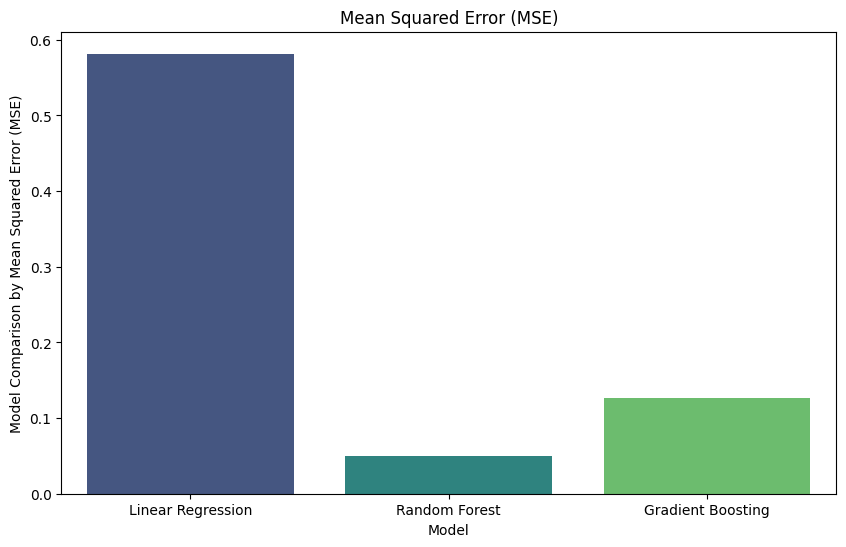

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data=comparDf, x='Model', y='MSE', hue='Model', dodge=False, palette='viridis')
plt.legend([],[], frameon=False) 
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('Model Comparison by Mean Squared Error (MSE)')
plt.show()

8.1 Settings GridSearchCV for  Random Forest

In [50]:
rf = RandomForestRegressor(random_state=42)

paramGrid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

gridSearch = GridSearchCV(estimator=rf, param_grid=paramGrid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [51]:
print(f"Best Parameters: {gridSearch.best_params_}")
print(f"Best MSE: {-gridSearch.best_score_}")

Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best MSE: 0.0536786359657645


Best model on test data

In [52]:
best_rf = gridSearch.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)

In [53]:
print(f"Best Random Forest MSE: {mse_best_rf}")

Best Random Forest MSE: 0.04981233760872271


Random Forest test data evaluation

In [54]:
best_rf_model = gridSearch.best_estimator_
y_pred_test = best_rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE: {mse_test}")

Test MSE: 0.04981233760872271


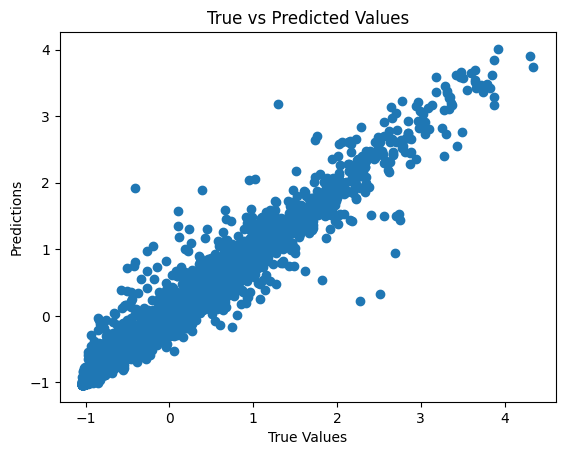

In [55]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

Коефіцієнт детермінації R^2

In [56]:
r2_test = r2_score(y_test, y_pred_test)
print(f"Test R^2: {r2_test}")

Test R^2: 0.9482462309571454


XGBoost - (GridSearchCV)

In [57]:
xgReg = XGBRegressor(random_state=42)

paramGrid_xg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
}

gridSearch_xg = GridSearchCV(estimator=xgReg, param_grid=paramGrid_xg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
gridSearch_xg.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [58]:
print(f"Best Parameters for XGBoost: {gridSearch_xg.best_params_}")
print(f"Best MSE for XGBoost: {-gridSearch_xg.best_score_}")

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best MSE for XGBoost: 0.041053139158093076


In [59]:
best_xg_model = gridSearch_xg.best_estimator_
y_pred_xg = best_xg_model.predict(X_test)
mse_xg = mean_squared_error(y_test, y_pred_xg)
print(f"XGBoost Test MSE: {mse_xg}")

XGBoost Test MSE: 0.03683132118820084


Порівняння Random Forest і XGBoost

In [60]:
y_pred_rf_test = best_rf_model.predict(X_test)
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

y_pred_xg_test = gridSearch_xg.best_estimator_.predict(X_test)
mse_xg_test = mean_squared_error(y_test, y_pred_xg_test)
r2_xg_test = r2_score(y_test, y_pred_xg_test)

start_time_rf = time.time()
best_rf_model.predict(X_test)
time_rf = time.time() - start_time_rf

start_time_xg = time.time()
gridSearch_xg.best_estimator_.predict(X_test)
time_xg = time.time() - start_time_xg

In [61]:
print("Random Forest - Test Results:")
print(f"MSE: {mse_rf_test}")
print(f"R^2: {r2_rf_test}")
print(f"Prediction Time: {time_rf} seconds")

print("\nXGBoost - Test Results:")
print(f"MSE: {mse_xg_test}")
print(f"R^2: {r2_xg_test}")
print(f"Prediction Time: {time_xg} seconds")

Random Forest - Test Results:
MSE: 0.04981233760872271
R^2: 0.9482462309571454
Prediction Time: 0.2104651927947998 seconds

XGBoost - Test Results:
MSE: 0.03683132118820084
R^2: 0.961733181339726
Prediction Time: 0.009945392608642578 seconds


Виявлення аномалій в numerical_cols
 - Використав IsolationForest, lof та svm

In [62]:
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
data_for_anomaly = data[numerical_cols]

In [63]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)

In [64]:
data_for_anomaly['anomaly'] = iso_forest.fit_predict(data_for_anomaly)
data_for_anomaly['anomaly'] = data_for_anomaly['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

C:\Users\legio\AppData\Local\Temp\ipykernel_2804\2080683541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_anomaly['anomaly'] = iso_forest.fit_predict(data_for_anomaly)
C:\Users\legio\AppData\Local\Temp\ipykernel_2804\2080683541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_anomaly['anomaly'] = data_for_anomaly['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')


In [65]:
print(data_for_anomaly['anomaly'].value_counts())

anomaly
Normal     16510
Anomaly      869
Name: count, dtype: int64


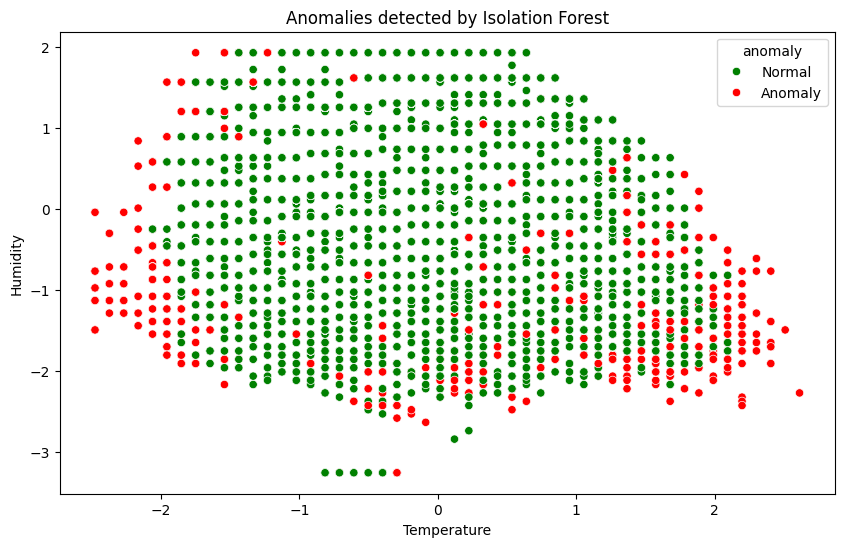

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='hum', hue='anomaly', data=data_for_anomaly, palette=['green', 'red']) 
plt.title('Anomalies detected by Isolation Forest')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

LOF

In [73]:
X_scaled = scaler.fit_transform(X)

In [80]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lofLabels = lof.fit_predict(X_scaled) 
lofScores = -lof.negative_outlier_factor_ 

In [81]:
data['LOF_Score'] = lofScores
data['LOF_Anomaly'] = (lofLabels == -1).astype(int)

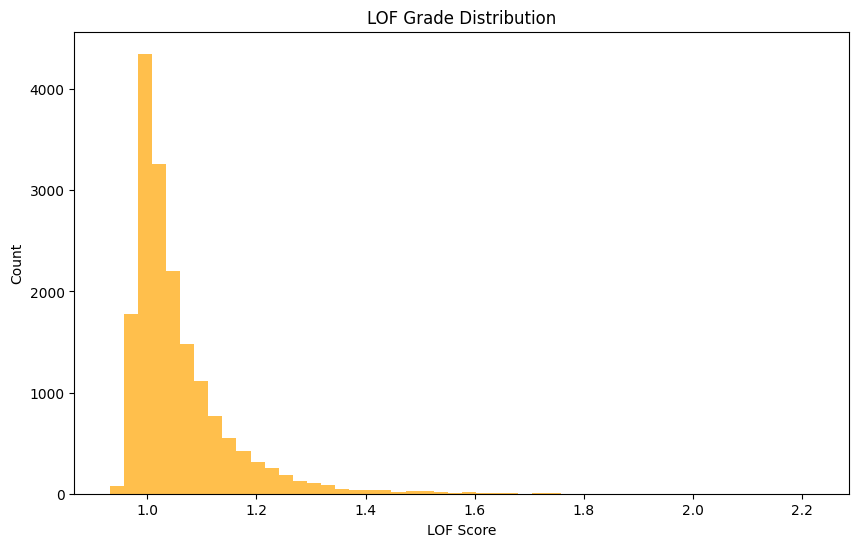

In [82]:
plt.figure(figsize=(10, 6))
plt.hist(lofScores, bins=50, color='orange', alpha=0.7)
plt.title("LOF Grade Distribution")
plt.xlabel("LOF Score")
plt.ylabel("Count")
plt.show()

In [83]:
anomData_lof = data[data['LOF_Anomaly'] == 1]
print("LOF Anomaly:", len(anomData_lof))
print(anomData_lof.head())

LOF Anomaly: 869
     index     date  season  yr  mnth  hr  holiday  weekday  workingday  \
142    143   1/7/11  spring   0     1   5        0        5           1   
288    289  1/13/11  spring   0     1  11        0        4           1   
431    432  1/20/11  spring   0     1   0        0        4           1   
460    461  1/21/11  spring   0     1   5        0        5           1   
467    468  1/21/11  spring   0     1  12        0        5           1   

     weathersit      temp     atemp       hum  windspeed       cnt  LOF_Score  \
142           3 -1.438516 -1.181732 -0.400306  -1.553889 -1.016985   1.431497   
288           2 -1.542385 -1.798566 -0.970478   2.106501 -0.840562   1.402882   
431           1 -1.230779 -1.445923 -0.348473   1.618504 -0.972879   1.259561   
460           1 -1.334648 -1.622245 -0.141137   1.862094 -1.016985   1.281846   
467           1 -1.438516 -1.710696 -1.851653   3.204291 -0.614520   1.360891   

     LOF_Anomaly  
142            1  
288    

Аномалії по рокам

In [67]:
data_for_anomaly['year'] = data['yr'].map({0: 2011, 1: 2012})
anomaly_count_by_year = data_for_anomaly.groupby(['year', 'anomaly']).size().unstack().fillna(0)

C:\Users\legio\AppData\Local\Temp\ipykernel_2804\433825799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_anomaly['year'] = data['yr'].map({0: 2011, 1: 2012})


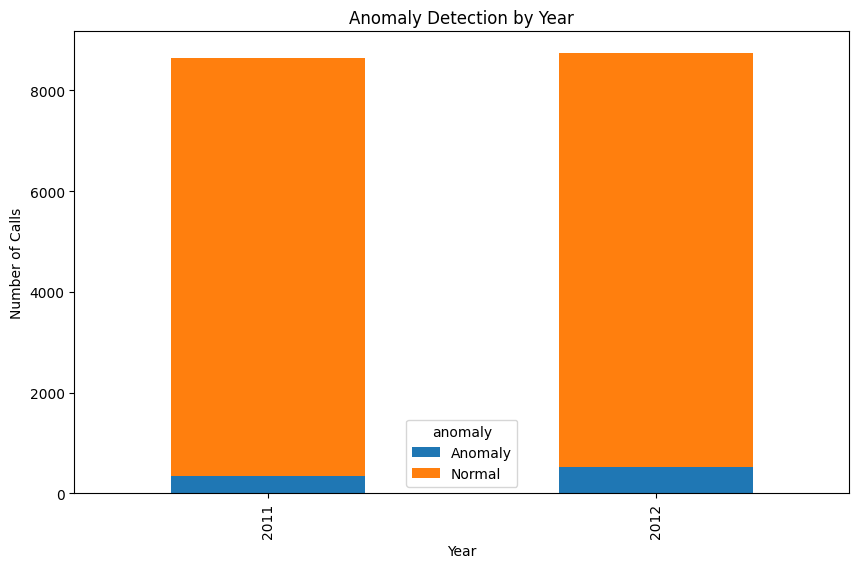

In [68]:
anomaly_count_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Anomaly Detection by Year')
plt.ylabel('Number of Calls')
plt.xlabel('Year')
plt.show()

One-Class SVM

In [69]:
Svm = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')
data_for_anomaly['anomaly_svm'] = Svm.fit_predict(data_for_anomaly[numerical_cols])

C:\Users\legio\AppData\Local\Temp\ipykernel_2804\290676478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_anomaly['anomaly_svm'] = Svm.fit_predict(data_for_anomaly[numerical_cols])


In [70]:
print(data_for_anomaly['anomaly_svm'].value_counts())

anomaly_svm
 1    16507
-1      872
Name: count, dtype: int64


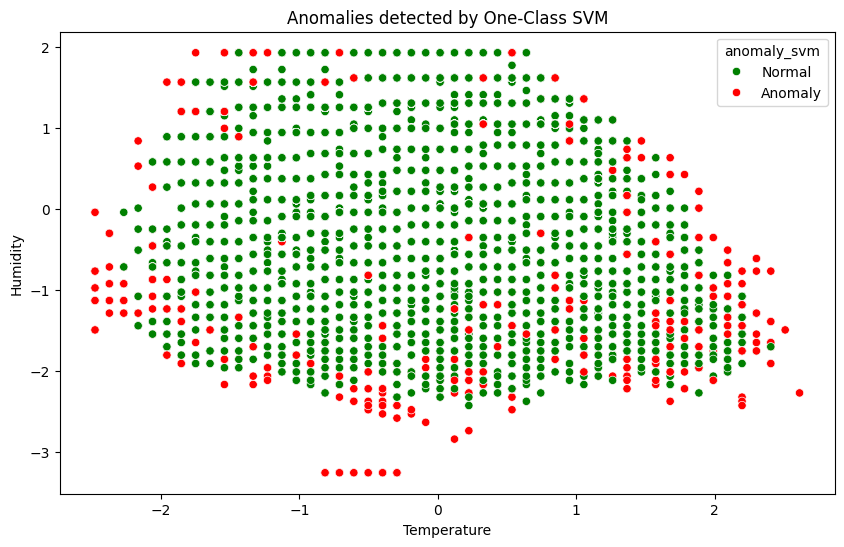

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_for_anomaly, x='temp', y='hum', hue=data_for_anomaly['anomaly_svm'].map({-1: 'Anomaly', 1: 'Normal'}), palette=['green', 'red'])
plt.title('Anomalies detected by One-Class SVM')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

# Лаборатора 7: Звіт 

- Датасет містить 15 колонок і 17,379 записів.
- пропущених данів немає
- Типи даних: числові та категоріальні (int, float, object)

### Розділив дані на: 

- Категоріальні (categorical_cols): ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'] 
- Числові (numerical_cols): ['temp', 'atemp', 'hum', 'windspeed', 'cnt'] 

### Розподіл даних
1. у графічному аналізі(plt) для категоріальних даних:
   - кількість викликів більше у вечірній час (hr), особливо у весняний і літній період (season)

2. Всі числові змінні окрім cnt мають помірну щільність. 
   - cnt дуже сильно скошене в право (висока концентрація низьких значень).

### Скошеність і куртозис

1. cnt - скошеність 1.28 (нерівномірний розподіл)
2. windspeed - 0.57 (помірно скошений)

### Матриця кореляції

1. Найбільшу кореляцію з cnt мають:
   - temp -> 0.405
   - atemp -> 0.401
   - hr -> 0.394

2. Серед погодних умов, найменший вплив на кількість викликів має windspeed (-0.13).

### Моделі регресії і Навчання моделей

0. Використав три моделі для навчання передбачень кл. вікликів:
   - Лінійна регресія
   - Random Forest
   - XGBoost

1. розділив на навч. та тестову вибірку
2. Підбір гіперпараметрів: 
   - для XGBoost і Random Forest було використано GridSearchCV
   - навчав через параметри (paramGrid_xg) - XGBoost, (paramGrid_rf) - Random Forest

   ![model_regression](./model_regression.png)

   - Найкраший результат -> XGBoost (показує найвищу точність і стабільність.)

### Що впливає на кількість викликів?: 
   - temp: підвищення температури збільшує кількість викликів.
   - hr: пікові години -> вечірній період.
   - weathersit: дощ і сніг негативно впливають.

### Виявлення аномалій

1. Методи які використав: 
   - Isolation Forest
   - One-Class SVM
   - LOF 

2. з категоріальних взяв роки (yr), а по числовим 'temp', 'atemp', 'hum', 'windspeed', 'cnt'.

   ![Anomalies](./Anomalies.png)

   - Аномалії найчастіше спостерігались у 2012 році

## Висновки
0. Температура, час доби та погодні умови найбільше впливають на кількість викликів швидкої допомоги.
1. Основними чинниками кількості викликів є температура, час доби та погодні умови.
2. Найкраща модель для передбачення кількості викликів швидкої допомоги -> XGBoost
3. Найбільша кореляція з кількістю викликів була у змінних temp, atemp та hr.
4. Аномалії в основному спостерігались у 2012 році.
5. Коефіцієнт детермінації (R^2): 0.9482462309571454